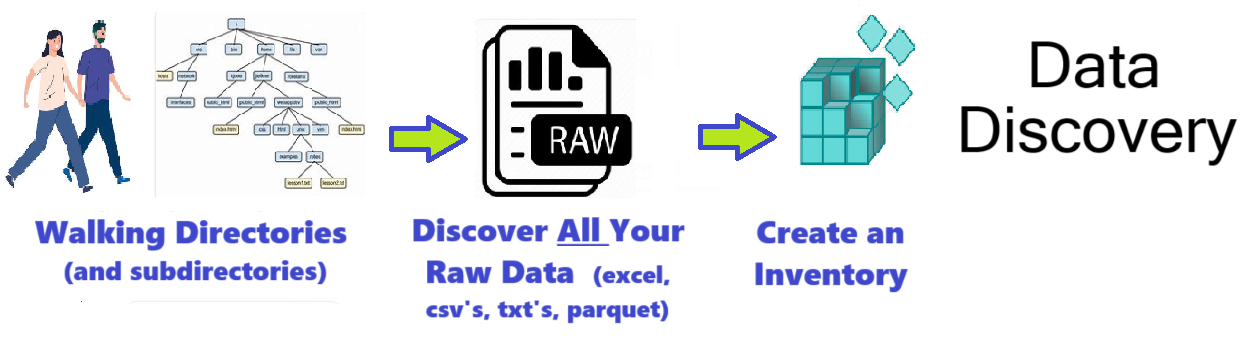

# Data Discovery 
#### Joe Eberle, Alan Calhoun, Helmi (Al)  Seoud Code Refactored ON  : 9/20/2022  ---  Revised ON  : 10/19/2022 - Refactored 03/22/2023


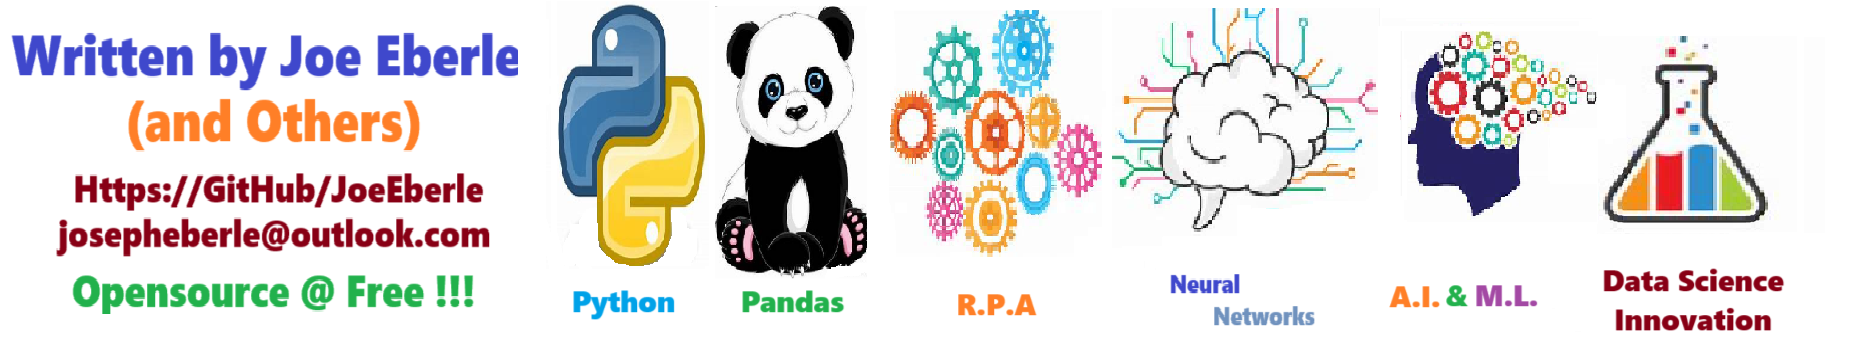

In [1]:
# Import the necessary Libraries 
import configparser
import pyttsx3
import pandas as pd 
import glob, os
import timeit
import time
from datetime import date, datetime
# import talking_code_data_discovery as tc

## Step 0 - Start Config Parser and Name the solution

In [2]:
# Install any libraries you dont already have installed 
import configparser   
from datetime import date, datetime

# establish the configuration settings parser
config = configparser.ConfigParser()  
cfg = config.read('config.ini')   
config = configparser.ConfigParser()

# Establish some parameters 
solution_name = 'data_discovery'

current_working_directory = os.getcwd()
print(f'Step 0 - The solution {solution_name} is starting with the current working directory is:{current_working_directory} ')

Step 0 - The solution data_discovery is starting with the current working directory is:C:\Users\josep 


## Step 0 - Initiate the Logger 

In [3]:
# Establish the Python Logger  
import logging # built in python library that does not need to be installed 
import quick_logger as ql

global start_stime 
start_time = ql.set_start_time()
logging = ql.create_logger_start(solution_name, start_time) 
ql.set_speaking_log(False)
ql.set_speaking_steps(True)
ql.pvlog('info',f'Process {solution_name} Step 0 - Initializing and starting Process.') 

Process data_discovery Step 0 - Initializing and starting Process.


In [18]:
introduction =  "This jupiter notebook will discover all of the raw data files under a specified directory and register them.  \n"
introduction = introduction + "The files that are discovered will be placed in a registry for future import or analysis  \n"

credits = "This Jupiter notebook was developed \n"
credits = credits + "In collaboration by Joe Eberle and others including Alan Calhoun, Helmi (Al) Seoud \n"
credits = credits + "The solution was developed in Python starting on 9/20/2022 \n"
credits = credits + "This solution is free and Open Source and the code is openly available for general use \n"

process = "The process flow is :\n"
process = process + "Step 1: Establish The Root Directory to search for data files under \n"
process = process + "Step 2: Walk the directory structure discovering data to discover all data directories \n"
process = process + "Step 3: Discover all the CSV files or Excel data and register them for future import \n"
process = process + "Step 4: Save the registry of files to import \n"

talking_introduction  = False
if talking_introduction:
    ql.talk(introduction)
else:
    print(introduction)
    
talking_project  = False
if talking_project:
    ql.talk(credits)
    ql.talk(process)    
else:
    print(credits)    
    print(process)        

This jupiter notebook will discover all of the raw data files under a specified directory and register them.  
The files that are discovered will be placed in a registry for future import or analysis  

This Jupiter notebook was developed 
In collaboration by Joe Eberle and others including Alan Calhoun, Helmi (Al) Seoud 
The solution was developed in Python starting on 9/20/2022 
This solution is free and Open Source and the code is openly available for general use 

The process flow is :
Step 1: Establish The Root Directory to search for data files under 
Step 2: Walk the directory structure discovering data to discover all data directories 
Step 3: Discover all the CSV files or Excel data and register them for future import 
Step 4: Save the registry of files to import 



## Step 0 - Initialize global count variables 

In [5]:
import_directory_file_Number  = 0
total_csv_file_count  = 0
import_file_Number  = 0 
event_log_row = 0
sub_directory_count = 0 

### Project Setup - Importing Libraries and Initializing Global Variables 

In [6]:
# Establish some import parameters 
importing_xlsx_files = False 
importing_csv_files = True 
Data_Import_Starting_Directory = 'C:/Data/'  # replace with whatever directories you want serached 
Process_Name = 'data_discovery'

## add the glaobal data frames for event loggging and Schema Creation 
df_event_log = pd.DataFrame(columns = ('Event_ID','Process_Name','Event_Name','Event_Date','Event_Time','Task_Start_Time','Task_End_Time','TASk_Duration','Comments'))
df_import_directories = pd.DataFrame(columns = ('Root_Directory','Sub_Directory'))
df_import_files = pd.DataFrame(columns = ('Root_Directory','Sub_Directory','Table_Name','Import_File_Name','File_Size','File_Modified_Date','File_Created_Date'))


## Project Setup -    Establishing DataFrames & Establishing Global Functions

In [7]:
global talking_code 
global import_directory_file_Number 
global event_log_row 
global printing_output


def set_up_python_infrastructure():
    initialize_replacement_Dictionaries()    # Set up control libraries for syntactic Consistency 
    df_e_log = create_event_log_dataframe()  # Set up the Event Logging     

# Create dataframe to house Directories 
def create_directory_dataframe():
    df_import_directories = pd.DataFrame(columns = ('Root_Directory','Sub_Directory'))
    return df_import_directories  

def create_import_files_dataframe():
    df_import_files = pd.DataFrame(columns = ('Root_Directory','Sub_Directory','Table_Name','File_Name','File_Size_Bytes','File_Created','File_Modified'))
    return df_import_files  

def add_import_directory(Root_Directory,Sub_Directory):
    global import_directory_file_Number 
    import_directory_file_Number += 1  
    df_import_directories.loc[import_directory_file_Number] = [Root_Directory,Sub_Directory]
    return import_directory_file_Number 

def add_import_file(Root_Directory,Sub_Directory,Table_Name,File_Name,File_Size_Bytes,File_Created,File_Modified):
    global import_file_Number 
    import_file_Number += 1  
    df_import_files.loc[import_file_Number] = [Root_Directory,Sub_Directory,Table_Name,File_Name,File_Size_Bytes,File_Created,File_Modified]
    return import_directory_file_Number  

# Create dataframe to house Directories 
def create_event_log_dataframe():
    df_event_log = pd.DataFrame(columns = ('Event_ID','Process_Name','Event_Name','Event_Date','Event_Time','Task_Start_Time','Task_End_Time','TASk_Duration','Comments'))
    return df_event_log

df_event_log = create_event_log_dataframe()

# Create dataframe to database schema 
def create_database_schema_dataframe():
    df_schema = pd.DataFrame(columns = ('Database_Name','Table_Name','Column_Number','Column_Name','Column_Data_Type','Column_Sample_Data','Column_Description'))
    return df_schema

# Create dataframe to house Directories 
def add_log_event(Process_Name,Event_Name,Event_Date,Event_Time,Task_Start_Time,Task_End_Time, Task_Duration , Comments ):
    global event_log_row  
    event_log_row += 1  
    df_event_log.loc[event_log_row] = [event_log_row,Process_Name,Event_Name,Event_Date,Event_Time,Task_Start_Time,Task_End_Time, Task_Duration , Comments]

    
# Add Log Events 
def add_log_event_timer(Process_Name,Event_Name,Event_Date,Event_Time,Task_Start_Time,Task_End_Time, Task_Duration , Comments ):
    global event_log_row  
    event_log_row += 1  
    Event_Date = date.today()
    Event_Time = time.time() 
    df_event_log.loc[event_log_row] = [event_log_row,Process_Name,Event_Name,Event_Date,Event_Time,Task_Start_Time,Task_End_Time, Task_Duration , Comments]
    
# Reset the Event timer start time 
def reset_event_timer(Process_Name,Event_Name,Event_Date,Event_Time,Task_Start_Time,Task_End_Time, Task_Duration , Comments ):
    global event_log_row  
    event_log_row += 1  
    Event_Date = date.today()
    Event_Time = time.time() 
    Task_Start_Time    = time.time()  
    df_event_log.loc[event_log_row] = [event_log_row,Process_Name,Event_Name,Event_Date,Event_Time,Task_Start_Time,Task_End_Time, Task_Duration , Comments]

    # Get a list of all the Subfiles to iterate through 
def list_all_csv_files(path):
    extension = 'csv'
    os.chdir(path)
    print('CSV Files to Import from Directory:', path)
    csv_file_count = 0
    for file in glob.glob('*.{}'.format(extension)):
        csv_file_count += 1 
        tc.out('CSV File #{} filename: {}  '.format(str(csv_file_count),file))

# Get a list of all the Subfiles to iterate through 
def register_all_csv_files_for_import(path, table_name):
    global total_csv_file_count  
    extension = 'csv'
    os.chdir(path)
#     print('CSV Files to Import from Directory:', path)
    csv_file_count = 0
    for file in glob.glob('*.{}'.format(extension)):
        csv_file_count += 1 
        total_csv_file_count += 1         
        File_Size = os.path.getsize(file)
        File_Last_Modified =  time.ctime(os.path.getmtime(file))
        File_Create_Date =  time.ctime(os.path.getctime(file))
        Full_Path_File_Name = path + '\\' + file
        Full_Path_File_Name = Full_Path_File_Name.replace('/','\**').replace('\\','\**').replace('**','')
        ql.pvlog('info','CSV Total#{} File #{} filename: {}  '.format(str(total_csv_file_count),str(csv_file_count),Full_Path_File_Name)) 
        file_Number = add_import_file(path,path,table_name,Full_Path_File_Name,File_Size,File_Last_Modified,File_Create_Date)
        
def register_all_raw_files_for_import(path, table_name, file_extension):
    global total_csv_file_count  
    os.chdir(path)
    raw_file_count = 0
    for file in glob.glob('*.{}'.format(extension)):
        raw_file_count += 1 
        total_csv_file_count += 1         
        File_Size = os.path.getsize(file)
        File_Last_Modified =  time.ctime(os.path.getmtime(file))
        File_Create_Date =  time.ctime(os.path.getctime(file))
        Full_Path_File_Name = path + '\\' + file
        Full_Path_File_Name = Full_Path_File_Name.replace('/','\**').replace('\\','\**').replace('**','')
        ql.pvlog('info','Raw Total#{} File #{} filename: {}  '.format(str(total_csv_file_count),str(csv_file_count),Full_Path_File_Name)) 
        file_Number = add_import_file(path,path,table_name,Full_Path_File_Name,File_Size,File_Last_Modified,File_Create_Date)

def create_import_files_dataframe():
    df_import_files = pd.DataFrame(columns = ('Root_Directory','Sub_Directory','Table_Name','File_Name'))
    return df_import_files  

def add_import_directory(Root_Directory,Sub_Directory):
    global import_directory_file_Number 
    import_directory_file_Number += 1  
    df_import_directories.loc[import_directory_file_Number] = [Root_Directory,Sub_Directory]
    return import_directory_file_Number 

def add_import_File(Root_Directory,Sub_Directory,Table_Name,File_Name):
    global import_file_Number 
    import_file_Number += 1  
    df_import_files.loc[import_file_Number] = [Root_Directory,Sub_Directory,Table_Name,File_Name]
    return import_directory_file_Number          
        
    
def infer_table_name_from_path(path):
    table_name = path.replace(Data_Import_Starting_Directory,"").replace('Y:/_Kaleida_Input/','').replace('Y:_Kaleida_Input','').replace(' ','_').replace('/','').replace('\\','')
    table_name = customize_table_names(table_name)
    return table_name 
    
    
def column_create_SQL (import_df):
    column_name_List = [x.title() for x in import_df.columns] # Create a List of Columns 
    column_Str =  (', '.join(column_name_List)) # Convert List into one String with commas 
    tc.out('Columns =',column_Str)  
    return column_Str            
        
def list_all_xlsx_files(path):
    extension = 'xlsx'
    os.chdir(path)
    csv_file_count = 0
    for file in glob.glob('*.{}'.format(extension)):
        csv_file_count += 1 
        tc.out('File #{}   is {} '.format(csv_file_count,file))      
        
def convert_data_types(input_df):
    column_datatype_str = str(input_df.dtypes)
    column_datatype_str =  column_datatype_str.replace('dtype: object','').replace('object','varchar[255], ').replace('datetime64[ns]','timestamp, ').replace('float64','float, ')
    tc.out('create column SQL string: {} \n'.format(column_datatype_str))        
        
def read_and_clean_file(data_folder, filename):

    print('Import File =', filename)                 
    df_input_csv = pd.read_csv(filename, nrows=10)
    tc.out('Reading Dataframe Columns before cleanups:{}'.format(df_input_csv.columns))
    df_input_csv.columns = df_input_csv.columns.map('^'.join)
    df_input_csv.columns  = [x.strip().title().replace("^","").replace(" ","_").replace("#","Number").replace("#","Number").replace("%","Percentage") \
                             .replace('_Unnamed','').replace('Unnamed','').replace('Unnamed:','').replace('_Level','').replace("$","Dollar") \
                             .replace('_1','').replace('_2','').replace('_3','').replace('_4','').replace('_5','')  \
                             .replace('_6','').replace('_7','').replace('_8','').replace('_9','')  \
                             .replace('1','').replace('2','').replace('3','').replace('4','').replace('5','')  \
                             .replace('6','').replace('7','').replace('8','').replace('9','').replace('0','')  \
                             .replace('_0','').replace(':7','').replace(':8','').replace(':','').replace('Unnamed: ','')  \
                             for x in df_input_csv.columns]
    return df_input_csv    
 
        
    
def set_up_python_infrastructure():
    initialize_replacement_Dictionaries()    # Set up control libraries for syntactic Consistency 
    Initialize_Text_to_Speach()              # Intitialize Text to Speech Engine 
    df_event_log = create_event_log_dataframe()  # Set up the Event Logging to housae the events of this process 
    create_database_schema_dataframe()       # Set up the Database Schema dataframe to house the schema


## Process Reinitialize - Re initialize the Data Frames and all Global Counters to Zero 

In [8]:
 def reinitialize_project_infrastructure(): 
    global import_directory_file_Number 
    global import_file_Number  
    global event_log_row 
    global sub_directory_count  

    # recreate the dataframes 
    df_import_directories = create_directory_dataframe() 
    df_import_files = create_import_files_dataframe() 
    create_database_schema_dataframe() 

    # reset all the global Counters  
    import_directory_file_Number  = 0
    import_file_Number  = 0 
    event_log_row = 0
    sub_directory_count = 0 
reinitialize_project_infrastructure()

## Step 1 - Establish the root Directory 

In [9]:
process_name =  'Data Discovery'
Data_Import_Starting_Directory = 'C:\Data'
add_log_event(process_name,'step 1 - Establish the root Directory: {}'.format(Data_Import_Starting_Directory),datetime.now(),datetime.now(),time.time(),time.time(), 0 ,'Step 1 - Establish the root Directory: {}'.format(Data_Import_Starting_Directory))
Process_Step_Name = 'Step 1 - Establish the root Directory' 

    
ql.pvlog('info','Step 1 - Establish the root Directory')
ql.pvlog('info','The root directory to walk is : {}'.format(Data_Import_Starting_Directory))  
df_event_log.head()

Step 1 - Establish the root Directory
The root directory to walk is : C:\Data


,Event_ID,Process_Name,Event_Name,Event_Date,Event_Time,Task_Start_Time,Task_End_Time,TASk_Duration,Comments
1,1,Data Discovery,step 1 - Establish the root Directory: C:\Data,2023-08-25 18:36:30.915016,2023-08-25 18:36:30.915016,1.693003e+09,1.693003e+09,0,Step 1 - Establish the root Directory: C:\Data


## Step 2 - Walk the directory structure discovering data to discover all data directories

In [10]:
global sub_directory_count
# Get a list of all the Subfiles to iterate through 
def walk_sub_directories(root_directory):
    global sub_directory_count
    Process_Step_Name = 'Step 2 - Walk the directory structure discovering data to discover all data directories' 
    df_import_directories = create_directory_dataframe() 
    directory_entry = 0 
 
    for root, subdirectories, files in os.walk(root_directory):
        # hard coded - remove this later!!!!!! 
        # old data and Excel data should NOT BE Included under root 
        if (root.find('old') == -1) and (root.find('excel') == -1):
            ql.pvlog('info','Registering Directory # {} {}  '.format(directory_entry,root ))            
            directory_entry += 1 
            sub_directory_count += 1     
            num = add_import_directory(root, root)        
         
    return df_import_directories

ql.pvlog('info','Step 2 - Walk the directory structure  to discover all data directories')
add_log_event(Process_Name,'Step 2 - Walk the directory structure  to discover all data directories',datetime.now(),datetime.now(),time.time(),time.time(), 0 ,'Step 2 - Walk the directory structure  to discover all data directories'.format(Data_Import_Starting_Directory))
walk_sub_directories(Data_Import_Starting_Directory)  
ql.pvlog('info','Step 2 Done - Listing all Registered data Directories: ')


Step 2 - Walk the directory structure  to discover all data directories
Registering Directory # 0 C:\Data  
Registering Directory # 1 C:\Data\Behavioral Health  
Registering Directory # 2 C:\Data\brfss_cdc  
Registering Directory # 3 C:\Data\Chronic Kidney Disease  
Registering Directory # 4 C:\Data\Chronic_Disease_Indicators  
Registering Directory # 5 C:\Data\Data_Science_Data  
Registering Directory # 6 C:\Data\Data_Science_Data\Projects  
Registering Directory # 7 C:\Data\Data_Science_Data\Projects\AIHS  
Registering Directory # 8 C:\Data\Data_Science_Data\Projects\AIHS\Architecture  
Registering Directory # 9 C:\Data\Data_Science_Data\Projects\AIHS\Chatbot Initial Conversation - Botsociety_files  
Registering Directory # 10 C:\Data\Data_Science_Data\Test_Data  
Registering Directory # 11 C:\Data\Data_Science_Data\Test_Data\India Health Stats  
Registering Directory # 12 C:\Data\Data_Science_Data\Test_Data\Medicare  
Registering Directory # 13 C:\Data\Data_Science_Data\Test_Data\Me

In [11]:
# Persist the directories in an excel file Registry 
Data_Import_Starting_Directory =  'J:/IT GLIN Data Services Shared/TempData/'
Data_Import_Starting_Directory =  'C:/working_directory/temporary_data/'
Excel_file_Name = Data_Import_Starting_Directory + 'Import_Directory_Registry.xlsx'
ql.pvlog('info','Registering Directories in excel File:{} '.format(Excel_file_Name))
df_import_directories.to_excel(Excel_file_Name, index=False)
df_import_directories.head(100)

Registering Directories in excel File:C:/working_directory/temporary_data/Import_Directory_Registry.xlsx 


,Root_Directory,Sub_Directory
1,C:\Data,C:\Data
2,C:\Data\Behavioral Health,C:\Data\Behavioral Health
3,C:\Data\brfss_cdc,C:\Data\brfss_cdc
4,C:\Data\Chronic Kidney Disease,C:\Data\Chronic Kidney Disease
5,C:\Data\Chronic_Disease_Indicators,C:\Data\Chronic_Disease_Indicators
6,C:\Data\Data_Science_Data,C:\Data\Data_Science_Data
7,C:\Data\Data_Science_Data\Projects,C:\Data\Data_Science_Data\Projects
8,C:\Data\Data_Science_Data\Projects\AIHS,C:\Data\Data_Science_Data\Projects\AIHS
9,C:\Data\Data_Science_Data\Projects\AIHS\Archit...,C:\Data\Data_Science_Data\Projects\AIHS\Archit...
10,C:\Data\Data_Science_Data\Projects\AIHS\Chatbo...,C:\Data\Data_Science_Data\Projects\AIHS\Chatbo...


In [12]:
# Establish the Design Goals 
design_goal = "\n"
design_goal = design_goal + "\nThe design goals for this code are : \n\n"
design_goal = design_goal + "EXTENSIBILITY: Extensibility is an ability to add or extend additional elements and features to the existing code  \n"
design_goal = design_goal + "MAINTAINABILITY: The ability to easily maintain the solution  \n"
design_goal = design_goal + "ACCESSIBILITY: The ability to easily access and use the solution from anywhere \n"
design_goal = design_goal + "SECURITY: To secure the solution and data is only available to those who who have appropriate access \n"
design_goal = design_goal + "RELIABILITY: The code works consistently and can be counted on from a business perspective \n"
design_goal = design_goal + "CONSISTENCY: Consistency means having code work reliably and in the same manner every time \n"
design_goal = design_goal + "PERFORMANT: The solution performs quickly enough to meet the business demand \n"
design_goal = design_goal + "INTELLIGENT: The solution learns or provides new insights \n"
design_goal = design_goal + "SIMPLE: The solution should be lean and choose the simplist method of achievement \n"
design_goal = design_goal + "SELF DOCUMENTING: The code should be able to produce its own documentation \n"
design_goal = design_goal + "TALKING: The code should be smart enough to explain itself to a non technical human \n"
design_goal = design_goal + "PYTHONIC: If the solution is built in python it is built using the python way \n"
design_goal = design_goal + "NO CODE - LOW CODE: The solution should contain the minimal code or no code required to achieve objective \n"

talking_design_goals  = False
if talking_design_goals:
    ql.talk(design_goal)
else:
    print(design_goal) 
     



The design goals for this code are : 

EXTENSIBILITY: Extensibility is an ability to add or extend additional elements and features to the existing code  
MAINTAINABILITY: The ability to easily maintain the solution  
ACCESSIBILITY: The ability to easily access and use the solution from anywhere 
SECURITY: To secure the solution and data is only available to those who who have appropriate access 
RELIABILITY: The code works consistently and can be counted on from a business perspective 
CONSISTENCY: Consistency means having code work reliably and in the same manner every time 
PERFORMANT: The solution performs quickly enough to meet the business demand 
INTELLIGENT: The solution learns or provides new insights 
SIMPLE: The solution should be lean and choose the simplist method of achievement 
SELF DOCUMENTING: The code should be able to produce its own documentation 
TALKING: The code should be smart enough to explain itself to a non technical human 
PYTHONIC: If the solution is buil

## Step 3 - Discover and Register all CSV files to import

In [13]:
def get_directory_table_name(directory_name):
    table_name = 'unknown_' + directory_name.lower().replace(' ','_').replace('/','_').replace(':','_').replace('kalieda','gppc')
    dir_name = directory_name.lower()
    
# Start with the names the GPPC explicitly says not to LOAD
    if dir_name.find('patientinformation') > -1:
        table_name = 'unknown_table_name'       
    elif dir_name.find('main18under') > -1:
        table_name = 'unknown_table_name'   
    return table_name
 
developing_and_testing = True  
if developing_and_testing:
    test_result = get_directory_table_name('Access')
    status = f'\nTesting function: get_directory_table_name result: {test_result}' 
    print(status)


Testing function: get_directory_table_name result: unknown_access


In [14]:
def iterate_directories_to_import_files(Import_Directory_Data_Frame):
    ql.pvlog('info','Step 3 - Discover and Register all CSV files to import ')
    Process_Step_Name = 'Step 3 - Discover and Register all CSV files to import'  
    list_of_Directories = df_import_directories['Root_Directory']
    dir_count = 0
    for dir in list_of_Directories:
        dir_count += 1
        SQL_Table_Name = get_directory_table_name(dir)
        register_all_csv_files_for_import(dir, SQL_Table_Name   )

iterate_directories_to_import_files(df_import_directories)

Step 3 - Discover and Register all CSV files to import 
CSV Total#1 File #1 filename: C:\Data\Behavioral Health\2011.csv  
CSV Total#2 File #2 filename: C:\Data\Behavioral Health\2012.csv  
CSV Total#3 File #3 filename: C:\Data\Behavioral Health\2013.csv  
CSV Total#4 File #4 filename: C:\Data\Behavioral Health\2014.csv  
CSV Total#5 File #5 filename: C:\Data\Behavioral Health\2015.csv  
CSV Total#6 File #6 filename: C:\Data\Behavioral Health\Behavioral_Risk_Factor_Surveillance_System__BRFSS__Historical_Questions.csv  
CSV Total#7 File #7 filename: C:\Data\Behavioral Health\Behavioral_Risk_Factor_Surveillance_System__BRFSS__Prevalence_Data__2011_to_present_.csv  
CSV Total#8 File #1 filename: C:\Data\brfss_cdc\2011.csv  
CSV Total#9 File #2 filename: C:\Data\brfss_cdc\2012.csv  
CSV Total#10 File #3 filename: C:\Data\brfss_cdc\2013.csv  
CSV Total#11 File #4 filename: C:\Data\brfss_cdc\2014.csv  
CSV Total#12 File #5 filename: C:\Data\brfss_cdc\2015.csv  
CSV Total#13 File #6 filename:

In [15]:
os.chdir(current_working_directory) # necessary because the walker changes directories 

In [16]:
# Persist the csv files in an excel import file Registry 
Data_Import_Starting_Directory =  'J:/IT GLIN Data Services Shared/TempData/'
Data_Import_Starting_Directory =  'C:/working_directory/temporary_data/'
Excel_file_Name = Data_Import_Starting_Directory + 'Discovered_CSV_files_to_import.xlsx'
print('Registering Directories in excel File:{} '.format(Excel_file_Name))
df_import_files.to_excel(Excel_file_Name, index=False)

Registering Directories in excel File:C:/working_directory/temporary_data/Discovered_CSV_files_to_import.xlsx 


In [17]:
# Calculate and classify the process performance 
status = ql.calculate_process_performance(solution_name, start_time) 
print(ql.append_log_file(solution_name))  

2023-08-25 18:36:25,148 - INFO - START data_discovery =============================================
2023-08-25 18:36:25,148 - INFO - START data_discovery Start Time = 2023-08-25 18:36:25
2023-08-25 18:36:25,148 - INFO - data_discovery Step 0 - Initialize the configuration file parser
2023-08-25 18:36:25,169 - INFO - Imported existing <module 'comtypes.gen' from 'C:\\Users\\josep\\anaconda3\\lib\\site-packages\\comtypes\\gen\\__init__.py'>
2023-08-25 18:36:25,170 - INFO - Using writeable comtypes cache directory: 'C:\Users\josep\anaconda3\lib\site-packages\comtypes\gen'
2023-08-25 18:36:30,806 - INFO - Process data_discovery Step 0 - Initializing and starting Process.
2023-08-25 18:36:33,871 - INFO - Step 1 - Establish the root Directory
2023-08-25 18:36:33,871 - INFO - The root directory to walk is : C:\Data
2023-08-25 18:36:38,137 - INFO - Step 2 - Walk the directory structure  to discover all data directories
2023-08-25 18:36:38,141 - INFO - Registering Directory # 0 C:\Data  
2023-0

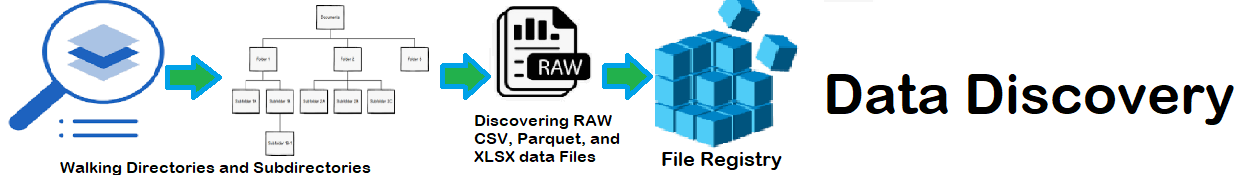

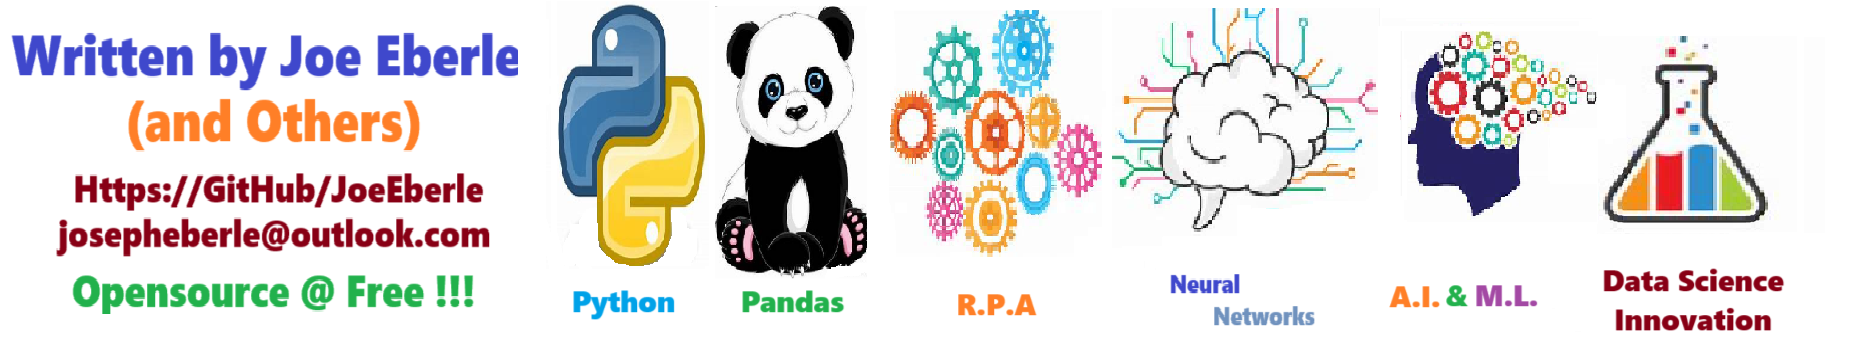